## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Import the Iris Dataset from a URL

In [3]:
df = pd.read_csv("/home/pict/31442_DSBDAL/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


##  Step 3: Initialize the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Check for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# Print basic statistics of the dataset
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


##  Step 4: Data Preprocessing

**1. Convert Categorical to Numerical Values**

In [ ]:
#The "species" column contains categorical values (Setosa, Versicolor, Virginica), so we need to convert them into numerical labels.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

df


**2. Check for Null Values**

In [11]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**3.  Divide Dataset into Independent (X) & Dependent (Y) Variables**

In [13]:
#X (features): Sepal Length, Sepal Width, Petal Length, Petal Width
#Y (target): Species

X = df.drop(columns=['Species'])  # Features
Y = df['Species']  # Target Variable

print("X Shape:", X.shape)
print("Y Shape:", Y.shape)

X Shape: (150, 5)
Y Shape: (150,)


**4. Split the Dataset into Training and Testing Sets**

In [15]:
# Import Scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display dataset sizes
print("Training Set:", X_train.shape, Y_train.shape)
print("Testing Set:", X_test.shape, Y_test.shape)

Training Set: (120, 5) (120,)
Testing Set: (30, 5) (30,)


**5. Scale the Features**

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5: Train Model using Naïve Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the classifier
gaussian = GaussianNB()

# Train the model using the training dataset
gaussian.fit(X_train_scaled, Y_train)

GaussianNB()

## Step 6: Make Predictions

In [20]:
# Predict labels for test set
Y_pred = gaussian.predict(X_test_scaled)

# Predict labels for train set
Y_train_pred = gaussian.predict(X_train_scaled)

##  Step 7: Evaluate the Model

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Precision & Recall
test_precision = precision_score(Y_test, Y_pred, average='micro')
test_recall = recall_score(Y_test, Y_pred, average='micro')

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Testing Recall: {test_recall:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 1.00
Testing Precision: 1.00
Testing Recall: 1.00


## Step 8: Compute & Visualize Confusion Matrix


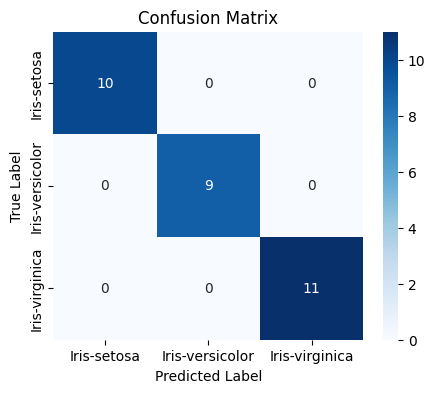

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Visualize using Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()